# **KNN**

* K Nearest Neighbors
* K -> number of neighbores(usually odd numbers)
* feature similarity to predict values
* both classification and regression
* target class -> classification
* target value -> regression

**Steps(classification)**
 1. Select K (no of neighbors)
 2. Find K nearest neighbors of the new data point based
 on Euclidean distance
 3. Among the K neighbors find the number of neighbors
 in each class.
 4. Assign the data point to that class having most number
 of neighbors

**Steps(regression)**
1. Select K
2. Choose K nearest neighbors of the new point
3. Make the target prediction by taking the average of all
 these neighboring data points



# **Example 1(regression)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [ ]:
df.shape

(53940, 11)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['cut']=label_encoder.fit_transform(df['cut'])
df['color']=label_encoder.fit_transform(df['color'])
df['clarity']=label_encoder.fit_transform(df['clarity'])

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64


In [ ]:
df=df.drop(columns='Unnamed: 0')

In [ ]:
df.dtypes

,0
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
x=df.drop(columns='price')
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [ ]:
y=df['price']
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [ ]:
x_train

array([[-0.98854083, -0.53496216,  0.23847805, ..., -1.10636033,
        -1.06153204, -1.14685181],
       [-0.50457272, -0.53496216, -0.34920334, ..., -0.37736693,
        -0.33575773, -0.40158564],
       [-0.58874109,  1.41053279,  0.23847805, ..., -0.5551702 ,
        -0.58632267, -0.45891381],
       ...,
       [ 1.68380479,  0.43778531,  1.41384085, ...,  1.62291983,
         1.61692076,  1.47591181],
       [ 1.38921551,  0.43778531,  0.82615945, ...,  1.39177559,
         1.3145148 ,  1.3325914 ],
       [-0.8202041 , -1.50770964, -0.93688474, ..., -0.98189804,
        -0.93192949, -0.87454302]])

In [ ]:
model=KNeighborsRegressor()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([4332. ,  787.2, 4264.8, ..., 8734.4, 1460.2, 4716.4])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 95.69%


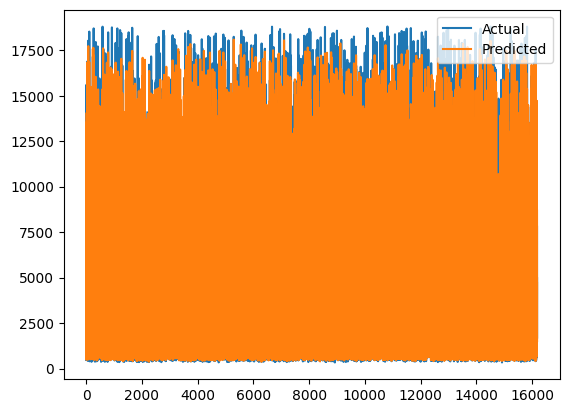

In [ ]:
a=pd.DataFrame({
    'Actual':y_test.values,
    'predicted':pred_y
})
plt.plot(a['Actual'],label='Actual')
plt.plot(a['predicted'],label="Predicted")
plt.legend()
plt.show()

In [ ]:
x.head()
a=pd.DataFrame([[0.23,3,2,59.72,40,2.87,3.44,1.88,2.45]])
predicted=model.predict(a)
print(f"Price : {np.round(predicted,2)}Rs")

Price : [3037.2]Rs


# **Example 2(classification)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df.isna().sum()

,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
df.shape

(891, 12)

In [ ]:
df=df.drop(columns=['PassengerId','Name','Cabin'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,female,35.0,1,0,113803,53.1000,S,1
4,3,male,35.0,0,0,373450,8.0500,S,0


In [ ]:
df.isna().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2
Survived,0


In [ ]:
df['Age']=df['Age'].fillna((df['Age'].mean()))

<Axes: xlabel='Embarked', ylabel='count'>

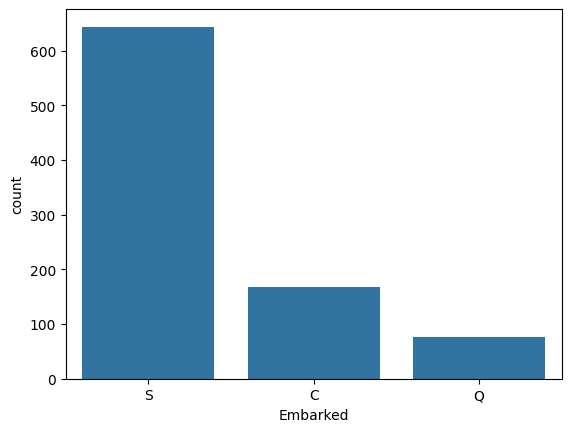

In [ ]:
sn.countplot(df,x='Embarked')

In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object
Survived,int64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Ticket']=label_encoder.fit_transform(df['Ticket'])
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [ ]:
df.dtypes

,0
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,int64
Fare,float64
Embarked,int64
Survived,int64


In [ ]:
x=df.drop(columns='Survived')
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2


In [ ]:
y=df['Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=7)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.83496748, -1.35821532, -0.81700888, ...,  0.33219761,
        -0.46982596,  0.57092896],
       [-0.36361487,  0.73626029, -0.81700888, ..., -0.57190687,
        -0.37509928,  0.57092896],
       [-0.36361487,  0.73626029,  1.71281692, ..., -0.89011124,
        -0.37509928,  0.57092896],
       ...,
       [-1.56219722, -1.35821532,  0.02626639, ...,  1.38277712,
         1.34471884, -1.99722081],
       [ 0.83496748,  0.73626029,  0.00320033, ...,  0.56453731,
        -0.47174413, -0.71314592],
       [ 0.83496748,  0.73626029, -0.89367027, ...,  0.36250279,
        -0.46982596,  0.57092896]])

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 74.25%


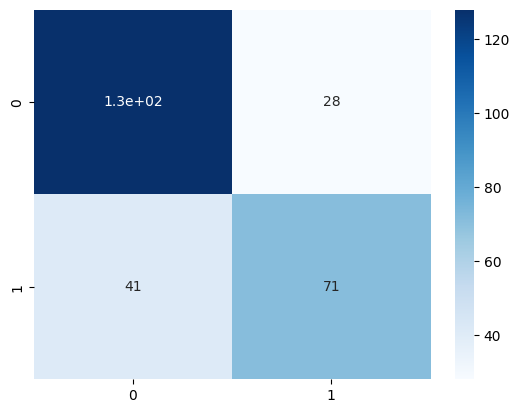

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.76      0.82      0.79       156\n           1       0.72      0.63      0.67       112\n\n    accuracy                           0.74       268\n   macro avg       0.74      0.73      0.73       268\nweighted avg       0.74      0.74      0.74       268\n'

In [ ]:
x.head()
a=pd.DataFrame([[3,1,23,0,25,85.21,1,1]])
predicted=model.predict(a)
#print(predicted)
if predicted == 1:
  print("The person survived")
else:
  print("Not Survived")

Not Survived


# **Example 3**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df=df.drop(columns='customer_id')
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64
estimated_salary,float64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
df['country']=label_encoder.fit_transform(df['country'])
df['gender']=label_encoder.fit_transform(df['gender'])

In [ ]:
df.dtypes

,0
credit_score,int64
country,int64
gender,int64
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64
estimated_salary,float64


In [ ]:
x=df.drop(columns='churn')
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
y=df['churn']
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [ ]:
x_train

array([[-1.44395693, -0.90643248,  0.90740923, ...,  0.65287278,
         0.97544426,  0.27639003],
       [-0.41311451,  1.51625838, -1.1020386 , ...,  0.65287278,
        -1.02517391, -1.06155829],
       [-1.68105068,  0.30491295, -1.1020386 , ..., -1.53169197,
        -1.02517391, -1.52874803],
       ...,
       [-0.69144197, -0.90643248, -1.1020386 , ...,  0.65287278,
        -1.02517391, -1.50869193],
       [ 0.29816675, -0.90643248,  0.90740923, ..., -1.53169197,
         0.97544426,  1.27026603],
       [-1.66043383,  0.30491295, -1.1020386 , ...,  0.65287278,
        -1.02517391, -1.07956894]])

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 83.07%


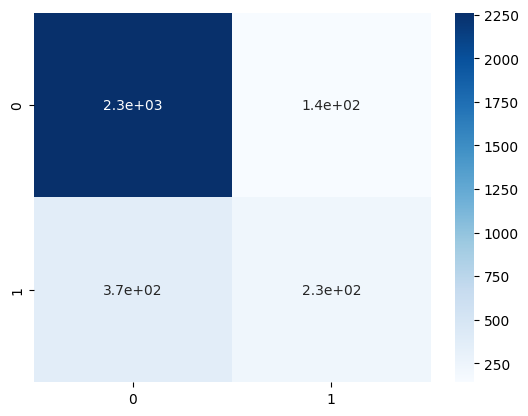

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.86      0.94      0.90      2403\n           1       0.62      0.39      0.48       597\n\n    accuracy                           0.83      3000\n   macro avg       0.74      0.66      0.69      3000\nweighted avg       0.81      0.83      0.81      3000\n'

In [ ]:
x.head()
a=pd.DataFrame([[700,3,1,23,5,75000,2,3,1,90000]])
predict=model.predict(a)
#print(predict)
if predict==0:
  print("The Customer will not Leave")
else:
  print("The customer will leave")

The Customer will not Leave


# **Iris_dataset and start classification**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.datasets import load_iris

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64


<Axes: xlabel='target', ylabel='count'>

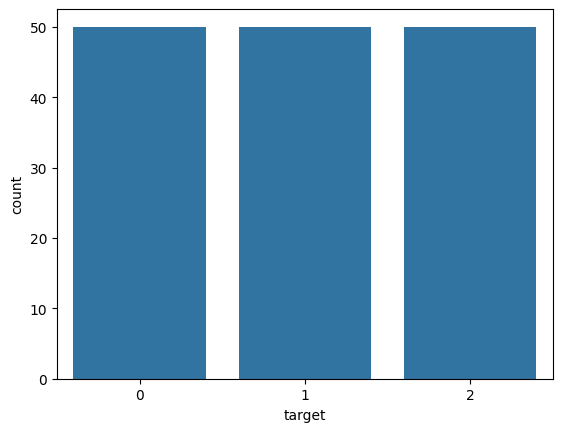

In [ ]:
sn.countplot(df,x='target')

In [ ]:
x=df.drop(columns='target')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=df['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=7)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
x_train

array([[-0.94886213,  0.56140508, -1.26034694, -1.23811845],
       [ 1.03907086,  0.11142391,  0.41127111,  0.31260645],
       [ 0.22051021, -1.91349138,  0.1883887 , -0.20430185],
       [ 0.68825915, -0.78853844,  0.91275652,  0.95874182],
       [-1.29967384,  0.3364145 , -1.14890574, -1.23811845],
       [-1.41661107,  0.11142391, -1.20462634, -1.23811845],
       [-0.8319249 ,  0.78639567, -1.20462634, -1.23811845],
       [ 2.2084432 ,  1.68635802,  1.69284495,  1.34642304],
       [-1.76742277, -0.11356668, -1.42750875, -1.36734552],
       [ 0.57132192,  0.56140508,  1.30280073,  1.73410427],
       [-0.36417596, -1.4635102 ,  0.0212269 , -0.20430185],
       [-0.94886213, -2.36347255, -0.09021431, -0.20430185],
       [ 0.80519639, -0.56354785,  0.52271231,  0.44183352],
       [-0.94886213,  0.78639567, -1.14890574, -0.9796643 ],
       [-1.65048554, -0.33855726, -1.26034694, -1.23811845],
       [-0.94886213,  1.01138626, -1.14890574, -0.72121015],
       [ 1.03907086,  0.

In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64


In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2,
       1])

In [ ]:
a=model.score(x_test,y_test)
print(f"Accuracy of the model : {np.round((a*100),2)}%")

Accuracy of the model : 88.89%


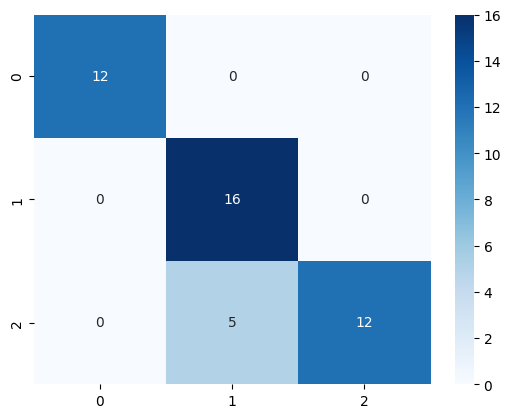

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        12\n           1       0.76      1.00      0.86        16\n           2       1.00      0.71      0.83        17\n\n    accuracy                           0.89        45\n   macro avg       0.92      0.90      0.90        45\nweighted avg       0.92      0.89      0.89        45\n'

In [ ]:
x.head()
a=pd.DataFrame([[4.7,3.7,2,.7]])
predict=model.predict(a)
print(predict)

[2]


# **Example 5**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [ ]:
df=df.drop(columns='User_ID')
df.head()

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


In [ ]:
df.shape

(500, 9)

In [ ]:
df.dtypes

,0
Age,int64
Gender,object
Daily_Screen_Time(hrs),float64
Sleep_Quality(1-10),float64
Stress_Level(1-10),float64
Days_Without_Social_Media,float64
Exercise_Frequency(week),float64
Social_Media_Platform,object
Happiness_Index(1-10),float64


<Axes: xlabel='Gender', ylabel='count'>

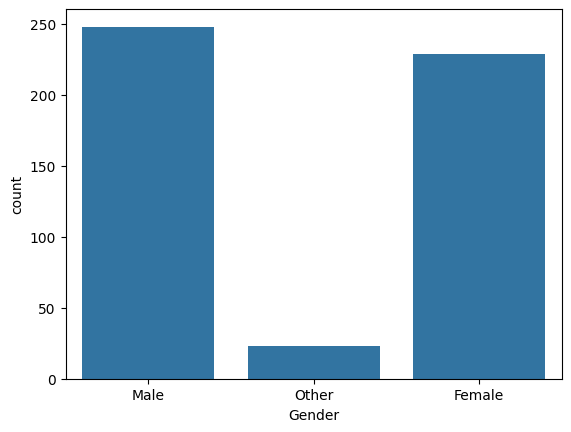

In [ ]:
sn.countplot(df,x='Gender')

<Axes: xlabel='Social_Media_Platform', ylabel='count'>

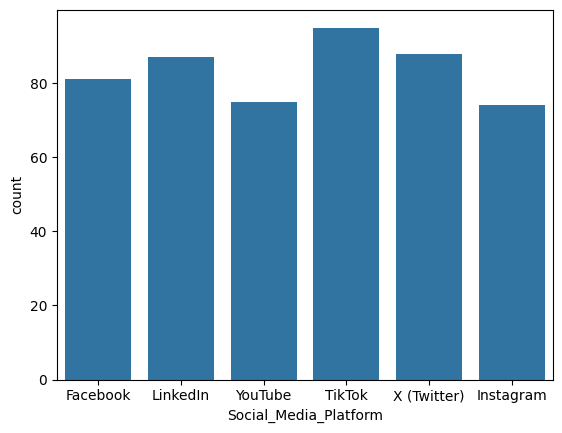

In [ ]:
sn.countplot(df,x='Social_Media_Platform')

In [ ]:
label_encoder=LabelEncoder()
df['Social_Media_Platform']=label_encoder.fit_transform(df['Social_Media_Platform'])
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df.dtypes

,0
Age,int64
Gender,int64
Daily_Screen_Time(hrs),float64
Sleep_Quality(1-10),float64
Stress_Level(1-10),float64
Days_Without_Social_Media,float64
Exercise_Frequency(week),float64
Social_Media_Platform,int64
Happiness_Index(1-10),float64


In [ ]:
x=df.drop(columns='Happiness_Index(1-10)')
x.head()

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform
0,44,1,3.1,7.0,6.0,2.0,5.0,0
1,30,2,5.1,7.0,8.0,5.0,3.0,2
2,23,2,7.4,6.0,7.0,1.0,3.0,5
3,36,0,5.7,7.0,8.0,1.0,1.0,3
4,34,0,7.0,4.0,7.0,5.0,1.0,4


In [ ]:
y=df['Happiness_Index(1-10)']
y.head()

,Happiness_Index(1-10)
0,10.0
1,10.0
2,6.0
3,8.0
4,8.0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)

**model 1 : Linear Regression**

In [ ]:
def LR(w,x,y,z):
  #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)
  model=LinearRegression()
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  m=np.round((model.score(x_test,y_test)*100),2)
  return m

**Model 2 : Decision Tree**

In [ ]:
def DT(w,x,y,z):
  #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)
  model=DecisionTreeRegressor()
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  m=np.round((model.score(x_test,y_test)*100),2)
  return m

**Model 3: Random Forest**

In [ ]:
def RF(w,x,y,z):
  #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)
  model=RandomForestRegressor(n_estimators=45,random_state=87)
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  m=np.round((model.score(x_test,y_test)*100),2)
  return m

**Model 4: KNN**

In [ ]:
def KN(w,x,y,z):
  #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=5)
  model=KNeighborsRegressor()
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  m=np.round((model.score(x_test,y_test)*100),2)
  return m

In [ ]:
a1=LR(x_train,x_test,y_train,y_test)
a2=DT(x_train,x_test,y_train,y_test)
a3=RF(x_train,x_test,y_train,y_test)
a4=KN(x_train,x_test,y_train,y_test)
print(f"Linear Regression : {a1}%")
print(f"Decision Tree : {a2}%")
print(f"Random Forest : {a3}%")
print(f"KNN : {a4}%")

Linear Regression : 67.88%
Decision Tree : 43.4%
Random Forest : 64.43%
KNN : 49.62%


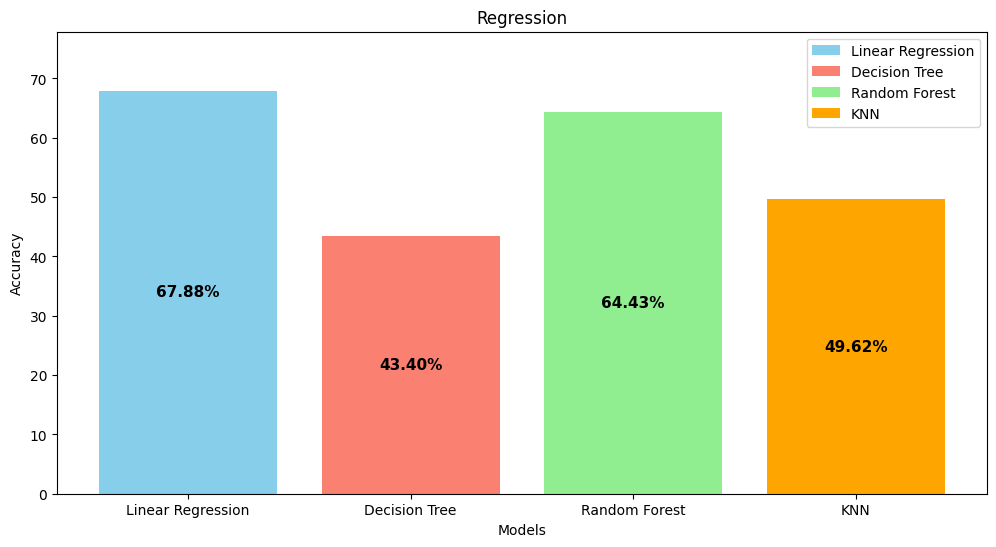

In [ ]:
categories=["Linear Regression","Decision Tree","Random Forest","KNN"]
values=[a1,a2,a3,a4]
colors=['skyblue','salmon','lightgreen','orange']
plt.figure(figsize=(12,6))
bars=plt.bar(categories,values,color=colors,label=categories)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position (middle of bar)
        height/2,                         # Y-position (middle of bar)
        f'{height:.2f}%',                 # Display 2 decimal places + '%'
        ha='center', va='center', color='black', fontsize=11, fontweight='bold'
    )

plt.legend()
plt.title("Regression")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, max(values) + 10)
plt.show()

In [ ]:
#x.head()
model=LinearRegression()
model.fit(x_train,y_train)
a=pd.DataFrame([[23,1,6,9,1,12,6,5]])
predict=model.predict(a)
print(f"Your Happiness Index is {predict}")

Your Happiness Index is [12.19098807]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Example 6**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer=load_breast_cancer
breast_cancer

<function sklearn.datasets._base.load_breast_cancer(*, return_X_y=False, as_frame=False)>

In [ ]:
breast_cancer_data= load_breast_cancer()
df=pd.DataFrame(breast_cancer_data.data,columns=breast_cancer_data.feature_names)
df['target']=breast_cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


<Axes: xlabel='target', ylabel='count'>

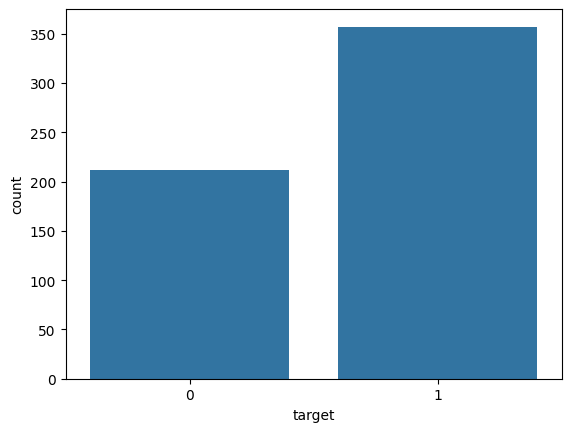

In [ ]:
sn.countplot(df,x='target')

In [ ]:
x=df.drop(columns='target')
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y=df['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=7)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
x_train

array([[-0.29511208,  2.01884665, -0.32552512, ..., -0.58289962,
        -0.74976247, -1.10350609],
       [-0.3388205 , -0.01735375, -0.4154202 , ..., -1.62297684,
        -0.80717249, -1.18894576],
       [-0.38799246,  0.03616923, -0.41304411, ..., -0.82199434,
         0.66860272, -0.38670053],
       ...,
       [-0.71034199,  1.17644146, -0.66253265, ...,  0.19514559,
        -0.19254757,  0.85328433],
       [-0.14213264,  0.67611793, -0.09781733, ...,  0.74959014,
         0.27517524,  0.49987478],
       [-1.53506509, -1.14831763, -1.53178237, ..., -1.79174065,
        -0.5488274 , -0.32400778]])

**Model 1 : Logistic Regression**

In [ ]:
def LR(w,x,y,z):
  model=LogisticRegression()
  model.fit(w,y)
  pred_y=model.predict(x)
  m=model.score(x,z)
  return np.round((m*100),2)

In [ ]:
a1=LR(x_train,x_test,y_train,y_test)
a1

np.float64(97.08)

**Model 2 : Decision Tree**

In [ ]:
def DT(w,x,y,z):
  model=DecisionTreeClassifier()
  model.fit(w,y)
  pred_y=model.predict(x)
  m=model.score(x,z)
  return np.round((m*100),2)

In [ ]:
a2=DT(x_train,x_test,y_train,y_test)
a2

np.float64(87.72)

**Model 3 : Random Forest**

In [ ]:
def RF(w,x,y,z):
  model=RandomForestClassifier(n_estimators=57,random_state=90)
  model.fit(w,y)
  pred_y=model.predict(x)
  m=model.score(x,z)
  return np.round((m*100),2)

In [ ]:
a3=DT(x_train,x_test,y_train,y_test)
a3

np.float64(89.47)

**Model 4 : KNN**

In [ ]:
def KN(w,x,y,z):
  model=KNeighborsClassifier()
  model.fit(w,y)
  pred_y=model.predict(x)
  m=model.score(x,z)
  return np.round((m*100),2)

In [ ]:
a4=KN(x_train,x_test,y_train,y_test)
a4

np.float64(98.25)

In [ ]:
print(f"Logistic Regression : {a1}%")
print(f"Decision Tree : {a2}%")
print(f"Random Forest : {a3}%")
print(f"KNN : {a4}%")

Logistic Regression : 97.08%
Decision Tree : 87.72%
Random Forest : 89.47%
KNN : 98.25%


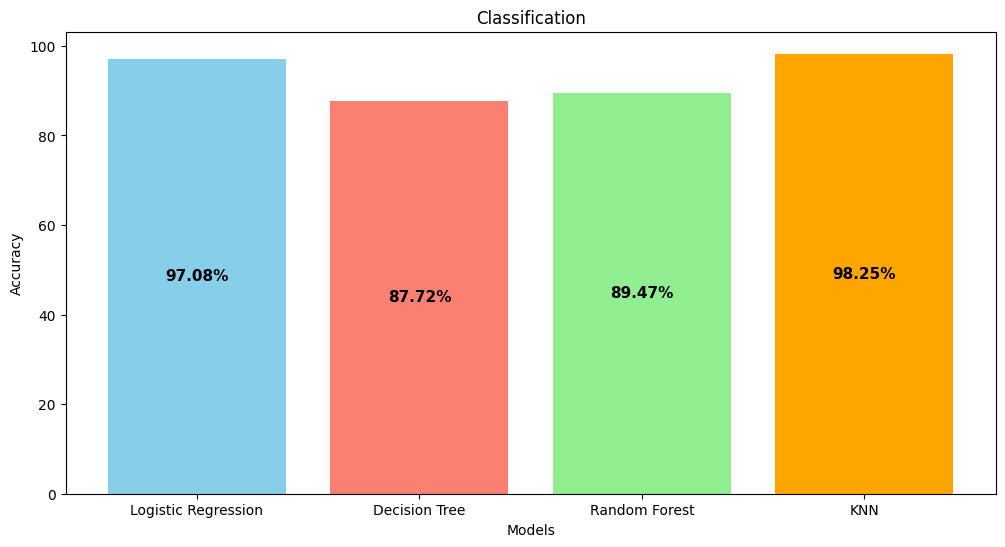

In [ ]:
categories=['Logistic Regression','Decision Tree','Random Forest','KNN']
accuracy=[a1,a2,a3,a4]
colors=['skyblue','salmon','lightgreen','orange']
plt.figure(figsize=(12,6))
plt.title("Classification")
plt.xlabel("Models")
plt.ylabel("Accuracy")

bars=plt.bar(categories,accuracy,color=colors,label=categories)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X-position (middle of bar)
        height/2,                         # Y-position (middle of bar)
        f'{height:.2f}%',                 # Display 2 decimal places + '%'
        ha='center', va='center', color='black', fontsize=11, fontweight='bold'
    )
plt.show()

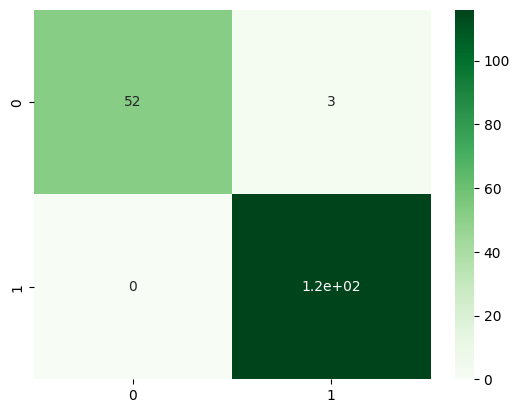

In [ ]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)
pred_y=model.predict(x_test)
cm=confusion_matrix(y_test,pred_y)
sn.heatmap(cm,annot=True,cmap='Greens')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.97        55\n           1       0.97      1.00      0.99       116\n\n    accuracy                           0.98       171\n   macro avg       0.99      0.97      0.98       171\nweighted avg       0.98      0.98      0.98       171\n'

In [ ]:
x.head()
a=pd.DataFrame([[19.54,9.83,150,998,0.15,0.23,0.334,.014,0.21,0.045,0.8,0.45,7.58,153.40,0.0052,0.045,0.512,0.01,
                 0.02,0.0014,25.1,17.21,156,1985,0.02,0.75,0.51,0.214,0.58,0.123]])
pred=model.predict(a)
#print(pred)
if pred==0:
  print("You dont't have Breast Cancer")
else:
  print("You have Breast Cancer")

You dont't have Breast Cancer
